# Deep Learning in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
import warnings

jtplot.style(theme='chesterish')
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

## Chapter 1. Basics of deep learning and neural networks

## 1. Introduction to deep learning

### Imagine you work for a bank

* You need to predict how many transactions each customer will make next year

### Example as seen by linear regression

<img src='Deep_Learning_in_Python/Pictures/Example_as_seen_by_linear_regression.png' alt='Example as seen by linear regression' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Example_as_seen_by_linear_regression_2.png' alt='Example as seen by linear regression' width=400 align='left'>

### Interactions

* Neural networks account for interactions really well
* Deep learning uses especially powerful neural networks
    * Text
    * Images
    * Videos
    * Audio
    * Source code

### Build deep learning models with keras

```python
In [1]: import numpy as np
    
In [2]: from keras.layers import Dense
    
In [3]: from keras.models import Sequential
    
In [4]: predictors = np.loadtxt('predictors_data.csv', delimiter=',')
    
In [5]: n_cols = predictors.shape[1]
    
In [6]: model = Sequential()
    
In [7]: model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
    
In [8]: model.add(Dense(100, activation='relu')

In [9]: model.add(Dense(1))
```

### Deep learning models capture interactions

<img src='Deep_Learning_in_Python/Pictures/Deep_learning_models_capture_interactions.png' alt='Deep learning models capture interactions' width=400 align='left'>

### Interactions in neural network

<img src='Deep_Learning_in_Python/Pictures/Interactions_in_neural_network.png' alt='Interactions in neural network' width=400 align='left'>

### №1 Comparing neural network models to classical regression models

Which of the models in the diagrams has greater ability to account for interactions?

* Model 1
* Model 2
* They are both the same

<img src='Deep_Learning_in_Python/Pictures/ch1ex2.png' alt='Interactions in neural network' width=300 align='left'>

## 2. Forward propagation

### Bank transactions example

* Make predictions based on:
    * Number of children
    * Number of existing accounts

### Forward propagation

<img src='Deep_Learning_in_Python/Pictures/Forward_propagation.png' alt='Forward propagation' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Forward_propagation2.png' alt='Forward propagation' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Forward_propagation3.png' alt='Forward propagation' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Forward_propagation4.png' alt='Forward propagation' width=400 align='left'>

### Forward propagation

* Multiply - add process
* Dot product
* Forward propagation for one data point at a time
* Output is the prediction for that data point

### Forward propagation code

<img src='Deep_Learning_in_Python/Pictures/Forward_propagation_code.png' alt='Forward propagation code' width=400 align='left'>

In [2]:
input_data = np.array([2, 3])
    
weights = {'node_0': np.array([1, 1]),
           'node_1': np.array([-1, 1]),
           'output': np.array([2, -1])}
    
node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

In [3]:
hidden_layer_values = np.array([node_0_value, node_1_value])
print(hidden_layer_values)

[5 1]


In [4]:
output = (hidden_layer_values * weights['output']).sum()
print(output)

9


### №2 Coding the forward propagation algorithm

* Calculate the value in node 0 by multiplying `input_data` by its weights `weights['node_0']` and computing their sum. This is the 1st node in the hidden layer
* Calculate the value in node 1 using `input_data` and `weights['node_1']`. This is the 2nd node in the hidden layer
* Put the hidden layer values into an array
* Generate the prediction by multiplying `hidden_layer_outputs` by `weights['output']` and computing their sum

In [5]:
input_data = np.array([3, 5])
weights = {'node_1': np.array([4, -5]),
           'node_0': np.array([2, 4]),
           'output': np.array([2, 7])}

node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

hidden_layer_outputs = np.array([node_0_value, node_1_value])
output = (hidden_layer_outputs * weights['output']).sum()

print(output)

-39


## 3. Activation functions

### Linear vs Nonlinear Functions 

<img src='Deep_Learning_in_Python/Pictures/Linear_vs_Nonlinear_Functions .png' alt='Linear vs Nonlinear Functions ' width=400 align='left'>

### Activation functions

* Applied to node inputs to produce node output

### Improving our neural network

<img src='Deep_Learning_in_Python/Pictures/Improving_our_neural_network.png' alt='Improving our neural network' width=400 align='left'>

### Activation functions

<img src='Deep_Learning_in_Python/Pictures/Activation_functions.png' alt='Activation functions' width=400 align='left'>

### ReLU (Rectified Linear Activation)

<img src='Deep_Learning_in_Python/Pictures/ReLU.png' alt='ReLU' width=400 align='left'>

$$ \begin{equation*} RELU(x) = \begin{cases} 0 &\text{if $x < 0$}\\ x &\text{if $x >= 0$}\end{cases}\end{equation*} $$

### Activation functions

In [6]:
input_data = np.array([-1, 2])

weights = {'node_0': np.array([3, 3]),
           'node_1': np.array([1, 5]),
           'output': np.array([2, -1])}

node_0_input = (input_data * weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)

node_1_input = (input_data * weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)

hidden_layer_outputs = np.array([node_0_output, node_1_output])

output = (hidden_layer_outputs * weights['output']).sum()
print(output)

0.9901095378334199


### №3 The Rectified Linear Activation Function

* Fill in the definition of the `relu()` function:
    * Use the `max()` function to calculate the value for the output of `relu()`
* Apply the `relu()` function to `node_0_input` to calculate `node_0_output`
* Apply the `relu()` function to `node_1_input` to calculate `node_1_output`

In [7]:
def relu(input):
    '''Define your relu activation function here'''
    output = max(0, input)
    return(output)

input_data = np.array([3, 5])
weights = {'node_0': np.array([2, 4]),
           'node_1': np.array([4, -5]),
           'output': np.array([2, 7])}

node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

hidden_layer_outputs = np.array([node_0_output, node_1_output])

model_output = (hidden_layer_outputs * weights['output']).sum()
print(model_output)

52


### №4 Applying the network to many observations/rows of data

* Define a function called `predict_with_network()` that accepts two arguments - `input_data_row` and `weights` - and returns a prediction from the network as the output
* Calculate the input and output values for each node, storing them as: `node_0_input`, `node_0_output`, `node_1_input`, and `node_1_output`
    * To calculate the input value of a node, multiply the relevant arrays together and compute their sum
    * To calculate the output value of a node, apply the `relu()` function to the input value of the node
* Calculate the model output by calculating `input_to_final_layer` and `model_output` in the same ay you calculated the input and output values for the nodes
* Use a `for` loop to iterate over `input_data`:
    * Use your `predict_with_network()` to generate predictions for each row of the `input_data` - `input_data_row`. Append each prediction to `results`

In [8]:
input_data = [np.array([3, 5]), 
              np.array([ 1, -1]), 
              np.array([0, 0]), 
              np.array([8, 4])]

weights = {'node_0': np.array([2, 4]), 
           'output': np.array([2, 7]), 
           'node_1': np.array([4, -5])}

In [9]:
def predict_with_network(input_data_row, weights):
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)
    
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)
    
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer) 
    
    return(model_output)


results = []
for input_data_row in input_data:
    results.append(predict_with_network(input_data_row, weights))

print(results)

[52, 63, 0, 148]


## 4. Deeper networks

### Multiple hidden layers

* Calculate with ReLU Activation Function

<img src='Deep_Learning_in_Python/Pictures/Multiple_hidden_layers.png' alt='Multiple hidden layers' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Multiple_hidden_layers2.png' alt='Multiple hidden layers' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Multiple_hidden_layers3.png' alt='Multiple hidden layers' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Multiple_hidden_layers4.png' alt='Multiple hidden layers' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Multiple_hidden_layers5.png' alt='Multiple hidden layers' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Multiple_hidden_layers6.png' alt='Multiple hidden layers' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Multiple_hidden_layers7.png' alt='Multiple hidden layers' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Multiple_hidden_layers8.png' alt='Multiple hidden layers' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Multiple_hidden_layers9.png' alt='Multiple hidden layers' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Multiple_hidden_layers10.png' alt='Multiple hidden layers' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Multiple_hidden_layers11.png' alt='Multiple hidden layers' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Multiple_hidden_layers12.png' alt='Multiple hidden layers' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Multiple_hidden_layers13.png' alt='Multiple hidden layers' width=400 align='left'>

<img src='Deep_Learning_in_Python/Pictures/Multiple_hidden_layers14.png' alt='Multiple hidden layers' width=400 align='left'>

### Representation learning

* Deep networks internally build representations of patterns in the data
* Partially replace the need for feature engineering
* Subsequent layers build increasingly sophisticated representations of raw data

### Deep learning

* Modeler doesn’t need to specify the interactions
* When you train the model, the neural network gets weightsthat find the relevant patterns to make be"er predictions

### Representation learning

<img src='Deep_Learning_in_Python/Pictures/Representation_learning.png' alt='Representation learning' width=400 align='left'>

### №5 Forward propagation in a deeper network

You now have a model with 2 hidden layers. The values for an input data point are shown inside the input nodes. The weights are shown on the edges/lines. What prediction would this model make on this data point?

Assume the activation function at each node is the identity function. That is, each node's output will be the same as its input. So the value of the bottom node in the first hidden layer is -1, and not 0, as it would be if the ReLU activation function was used

* *0*
* 7
* 9

<img src='Deep_Learning_in_Python/Pictures/ch1ex9.png' alt='Forward propagation in a deeper network' width=400 align='left'>

### №6 Multi-layer neural networks

* Calculate `node_0_0_input` using its weights `weights['node_0_0']` and the given `input_data`. Then apply the `relu()` function to get `node_0_0_output`
* Do the same as above for `node_0_1_input` to get `node_0_1_output`
* Calculate `node_1_0_input` using its weights `weights['node_1_0']` and the outputs from the first hidden layer - `hidden_0_outputs`. Then apply the `relu()` function to get `node_1_0_output`
* Do the same as above for `node_1_1_input` to get `node_1_1_output`
* Calculate `model_output` using its weights `weights['output']` and the outputs from the second hidden layer `hidden_1_outputs` array. Do not apply the `relu()` function to this output

In [10]:
input_data = np.array([3, 5])
weights = {'output': np.array([2, 7]), 
           'node_1_1': np.array([1, 2]), 
           'node_1_0': np.array([-1,  2]), 
           'node_0_0': np.array([2, 4]), 
           'node_0_1': np.array([ 4, -5])}

In [11]:
def predict_with_network(input_data):
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    model_output = relu((hidden_1_outputs * weights['output']).sum())
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


### №7 Representations are learned

How are the weights that determine the features/interactions in Neural Networks created?

* A user chooses them when creating the model
* *The model training process sets them to optimize predictive accuracy*
* The weights are random numbers

### №8 Levels of representation

Which layers of a model capture more complex or 'higher level' interactions?

* The first layers capture the most complex interactions
* *The last layers capture the most complex interactions*
* All layers capture interactions of similar complexity

## Chapter 2. Optimizing a neural network with backward propagation

## 5. The need for optimization

### A baseline neural network

* Actual Value of Target: 13
* Error: Predicted - Actual = -4

<img src='Deep_Learning_in_Python/Pictures/A_baseline_neural_network.png' alt='A baseline neural network' width=400 align='left'>

* Actual Value of Target: 13
* Error: Predicted - Actual = 0

<img src='Deep_Learning_in_Python/Pictures/A_baseline_neural_network2.png' alt='A baseline neural network' width=400 align='left'>

### Predictions with multiple points

* Making accurate predictions gets harder with more points
* At any set of weights, there are many values of the error
* … corresponding to the many points we make predictions for

### Loss function

* Aggregates errors in predictions from many data points into single number
* Measure of model’s predictive performance

### Squared error loss function

* Total Squared Error: 150
* Mean Squared Error: 50

<img src='Deep_Learning_in_Python/Pictures/Squared_error_loss_function.png' alt='Squared_error_loss_function' width=400 align='left'>

### Loss function

* Lower loss function value means a be!er model
* Goal: Find the weights that give the lowest value for the loss function
* Gradient descent

<img src='Deep_Learning_in_Python/Pictures/Loss_function.png' alt='Loss function' width=400 align='left'>

### Gradient descent

* Imagine you are in a pitch dark field
* Want to find the lowest point
* Feel the ground to see how it slopes
* Take a small step downhill
* Repeat until it is uphill in every direction

### Gradient descent steps

* Start at random point
* Until you are somewhere flat:
    * Find the slope
    * Take a step downhill

### Optimizing a model with a single weight

<img src='Deep_Learning_in_Python/Pictures/Optimizing_a_model_with_a_single_weight.png' alt='Optimizing a model with a single weight' width=400 align='left'>

### №8 Calculating model errors

What is the error (predicted - actual) for the following network when the input data is [3, 2] and the actual value of the target (what you are trying to predict) is 5?

* 5
* 6
* *11*
* 16

<img src='Deep_Learning_in_Python/Pictures/ch2_ex2_3.png' alt='ch2_ex2_3' width=400 align='left'>

### №9 Understanding how weights change model accuracy

Imagine you have to make a prediction for a single data point. The actual value of the target is 7. The weight going from `node_0` to the output is 2, as shown below. If you increased it slightly, changing it to 2.01, would the predictions become more accurate, less accurate, or stay the same?

* More accurate
* *Less accurate*
* Stay the same

<img src='Deep_Learning_in_Python/Pictures/ch2_ex2_3.png' alt='ch2_ex2_3' width=400 align='left'>

### №10 Coding how weight changes affect accuracy

* Create a dictionary of weights called `weights_1` where you have changed 1 weight from `weights_0` (You only need to make 1 edit to `weights_0` to generate the perfect prediction)
* Obtain predictions with the new weights using the `predict_with_network()` function with `input_data` and `weights_1`
* Calculate the error for the new weights by subtracting `target_actual` from `model_output_1`

In [12]:
def predict_with_network(input_data_point, weights):
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    hidden_layer_values = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)

In [13]:
input_data = np.array([0, 3])
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]}

target_actual = 3

model_output_0 = predict_with_network(input_data, weights_0)
error_0 = model_output_0 - target_actual

weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [-1, 1]}

model_output_1 = predict_with_network(input_data, weights_1)
error_1 = model_output_1 - target_actual

print(error_0)
print(error_1)

6
0


### №11 Scaling up to multiple data points

* Import `mean_squared_error` from `sklearn.metrics`
* Using a for loop to iterate over each row of `input_data`:
* Make predictions for each row with `weights_0` using the `predict_with_network()` function and append it to `model_output_0`
* Do the same for `weights_1`, appending the predictions to `model_output_1`
* Calculate the mean squared error of `model_output_0` and then `model_output_1` using the `mean_squared_error()` function. The first argument should be the actual values (`target_actuals`), and the second argument should be the predicted values (`model_output_0` or `model_output_1`)

In [14]:
target_actuals = np.array([1, 3, 5, 7])
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

weights_0 = {'node_1': np.array([1, 2]), 
             'output': np.array([1, 1]),
             'node_0': np.array([2, 1])}

weights_1 = {'node_1': np.array([1., 1.5]),
             'output': np.array([1., 1.5]),
             'node_0': np.array([2, 1])}

In [15]:
from sklearn.metrics import mean_squared_error

model_output_0 = []
model_output_1 = []

for row in input_data:
    model_output_0.append(predict_with_network(row, weights_0))
    model_output_1.append(predict_with_network(row, weights_1))

mse_0 = mean_squared_error(target_actuals, model_output_0)
mse_1 = mean_squared_error(target_actuals, model_output_1)

print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


## 6. Gradient descent

### Gradient descent

* If the slope is positive:
    * Going opposite the slope means moving to lowernumbers
    * Subtract the slope from the current value
    * Too big a step might lead us astray
* Solution: learning rate
    * Update each weight by subtracting **learning rate * slope**

<img src='Deep_Learning_in_Python/Pictures/Gradient_descent.png' alt='Gradient descent' width=400 align='left'>

### Slope calculation example

* To calculate the slope for a weight, need to multiply:
    * Slope of the loss function with respect to the value at the node we feed into
    * The value of the node that feeds into our weight
    * Slope of the activation function with respect to the value we feed into

<img src='Deep_Learning_in_Python/Pictures/Slope_calculation_example.png' alt='Slope calculation example' width=400 align='left'>

### Slope calculation example

* Slope mean squered loss function with respect to the prediction:
    * 2 * (Predicted Value - Actual Value) = 2 * Error
    * 2 * (-4)
* Slope mean squered loss function = 2 * (-4) * 3
* = -24
* If learning rate is 0.01, the new weight would be
* 2 - 0.01(-24) = 2.24

### Network with two inputs affecting prediction 

<img src='Deep_Learning_in_Python/Pictures/two_inputs_affecting_prediction.png' alt='Network with two inputs affecting prediction' width=200 align='left'>

### Code to calculate slopes and update weights

In [16]:
weights = np.array([1, 2])
input_data = np.array([3, 4])

target = 6
learning_rate = 0.01

preds = (weights * input_data).sum()

error = preds - target
print(error) 

5


In [17]:
gradient = 2 * input_data * error
gradient

array([30, 40])

In [18]:
weights_updated = weights - learning_rate * gradient

preds_updated = (weights_updated * input_data).sum()

error_updated = preds_updated - target
print(error_updated)

2.5


### №12 Calculating slopes

* Calculate the predictions, `preds`, by multiplying weights by the `input_data` and computing their sum
* Calculate the `error`, which is `target` minus preds. Notice that this error corresponds to `y-xb` in the gradient expression
* Calculate the slope of the loss function with respect to the prediction. To do this, you need to take the product of `input_data` and `error` and multiply that by `2`

In [19]:
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0

In [20]:
preds = (input_data * weights).sum()
error = preds - target

slope = 2 * input_data * error
print(slope)

[14 28 42]


### №13 Improving model weights

* Set the learning rate to be `0.01` and calculate the error from the original predictions
* Calculate the updated weights by subtracting the product of `learning_rate` and `slope` from `weights`
* Calculate the updated predictions by multiplying `weights_updated` with `input_data` and computing their sum
* Calculate the error for the new predictions. Store the result as `error_updated`

In [21]:
learning_rate = 0.01

preds = (weights * input_data).sum()
error = preds - target

slope = 2 * input_data * error

weights_updated = weights - learning_rate * slope

preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target

print(error)
print(error_updated)

7
5.04


### №14 Making multiple updates to weights

* Using a `for` loop to iteratively update weights:
    * Calculate the slope using the `get_slope()` function
    * Update the weights using a learning rate of `0.01`
    * Calculate the mean squared error `(mse`) with the updated weights using the `get_mse() `function
    * Append mse to `mse_hist`
* Visualize `mse_hist`

In [22]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)

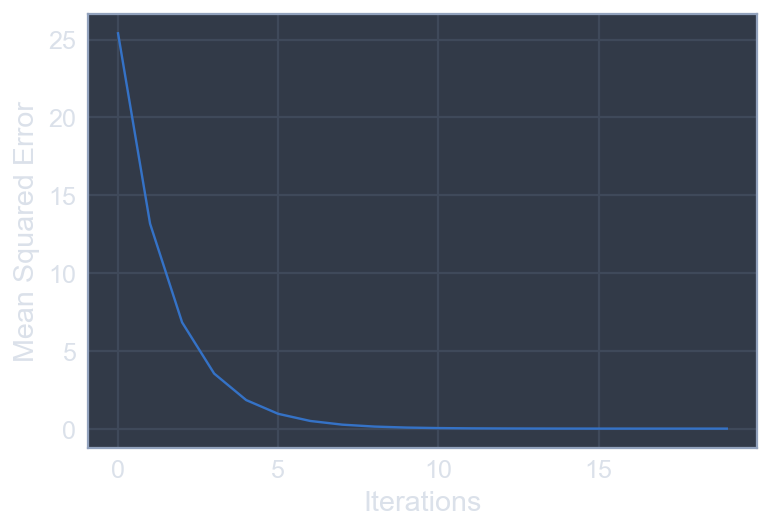

In [23]:
n_updates = 20
mse_hist = []

for i in range(n_updates):
    slope = get_slope(input_data, target, weights)
    weights = weights - 0.01 * slope
    mse = get_mse(input_data, target, weights)
    mse_hist.append(mse)

plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## 7. Backpropagation

### Backpropagation

* Allows gradient descent to update all weights in neural network (by getting gradients for all weights)
* Comes from chain rule of calculus
* Important to understand the process, but you will generally use a library that implements this

<img src='Deep_Learning_in_Python/Pictures/Backpropagation.png' alt='Backpropagation' width=400 align='left'>

### Backpropagation process

* Trying to estimate the slope of the loss function w.r.t each weight
* Do forward propagation to calculate predictions and errors

ReLU Activation Function
Actual Target Value = 4

<img src='Deep_Learning_in_Python/Pictures/Backpropagation_process.png' alt='Backpropagation process' width=400 align='left'>

ReLU Activation Function  
Actual Target Value = 4  
Error = 3

<img src='Deep_Learning_in_Python/Pictures/Backpropagation_process2.png' alt='Backpropagation process' width=400 align='left'>

### Backpropagation process

* Go back one layer at a time
* Gradients for weight is product of:
    1. Node value feeding into that weight
    2. Slope of loss function w.r.t node it feeds into
    3. Slope of activation function at the node it feeds into

### ReLU Activation Function

<img src='Deep_Learning_in_Python/Pictures/ReLu.png' alt='ReLu process' width=400 align='left'>

### Backpropagation process

* Need to also keep track of the slopes of the loss function w.r.t node values
* Slope of node values are the sum of the slopes for all weights that come out of them

### №15 The relationship between forward and backward propagation

If you have gone through 4 iterations of calculating slopes (using backward propagation) and then updated weights, how many times must you have done forward propagation?

* 0
* 1
* *4*
* 8

### №16 Thinking about backward propagation

If your predictions were all exactly right, and your errors were all exactly 0, the slope of the loss function with respect to your predictions would also be 0. In that circumstance, which of the following statements would be correct?

* *The updates to all weights in the network would also be 0*
* The updates to all weights in the network would be dependent on the activation functions
* The updates to all weights in the network would be proportional to values from the input data

## 8. Backpropagation in practice

### Backpropagation

* Top weight’s slope = 1 * 6
* Bottom weight’s slope = 3 * 6

ReLU Activation Function  
Actual Target Value = 4  
Error = 3  

<img src='Deep_Learning_in_Python/Pictures/Backpropagation5.png' alt='Backpropagation' width=250 align='left'>

### Backpropagation

<img src='Deep_Learning_in_Python/Pictures/Backpropagation3.png' alt='Backpropagation' width=250 align='left'>

### Calculating slopes associated with any weight

* Gradients for weight is product of:
    1. Node value feeding into that weight
    2. Slope of activation function for the node being fed into
    3. Slope of loss function w.r.t output node

### Backpropagation

<img src='Deep_Learning_in_Python/Pictures/Backpropagation4.png' alt='Backpropagation' width=400 align='left'>

### Backpropagation: Recap

* Start at some random set of weights
* Use forward propagation to make a prediction
* Use backward propagation to calculate the slope of the loss function w.r.t each weight
* Multiply that slope by the learning rate, and subtract from the current weights
* Keep going with that cycle until we get to a flat part

### Stochastic gradient descent

* It is common to calculate slopes on only a subset of the data (‘batch’)
* Use a different batch of data to calculate the next update
* Start over from the beginning once all data is used
* Each time through the training data is called an epoch
* When slopes are calculated on one batch at a time: stochastic gradient descent

### №15 A round of backpropagation

In the network shown below, we have done forward propagation, and node values calculated as part of forward propagation are shown in white. The weights are shown in black. Layers after the question mark show the slopes calculated as part of back-prop, rather than the forward-prop values. Those slope values are shown in purple  

This network again uses the ReLU activation function, so the slope of the activation function is 1 for any node receiving a positive value as input. Assume the node being examined had a positive value (so the activation function's slope is 1)  

* 0
* 2
* *6*
* Not enough information

<img src='Deep_Learning_in_Python/Pictures/ch2ex14_1.png' alt='ch2ex14_1' width=400 align='left'>

## Chapter 3. Building deep learning models with keras

## 9. Creating a keras model

### Model building steps

* Specify Architecture
* Compile
* Fit
* Predict

### Model specification

```python
In [1]: import numpy as np
    
In [2]: from keras.layers import Dense
    
In [3]: from keras.models import Sequential
    
In [4]: predictors = np.loadtxt('predictors_data.csv', delimiter=',')
    
In [5]: n_cols = predictors.shape[1]
    
In [6]: model = Sequential()

In [7]: model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
    
In [8]: model.add(Dense(100, activation='relu'))
    
In [9]: model.add(Dense(1))
```

### №16 Understanding your data

How many binary indicator predictors are there?

* 0
* 5
* *6*

In [24]:
df = pd.read_csv('Deep_Learning_in_Python/hourly_wages.csv')
df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### №17 Specifying a model

* Store the number of columns in the `predictors` data to `n_cols`
* Start by creating a `Sequential` model called `model`
* Use the `.add()` method on `model` to add a `Dense` layer
    * Add `50` units, specify `activation='relu'`, and the `input_shape` parameter to be the tuple `(n_cols,)` which means it has `n_cols` items in each row of data, and any number of rows of data are acceptable as inputs
* Add another `Dense` layer. This should have `32` units and a `'relu'` activation
* Finally, add an output layer, which is a `Dense` layer with a single node. Don't use any activation function here

In [25]:
predictors = df.iloc[:, 1:]
target = df['wage_per_hour']

In [26]:
import keras
from keras.layers import Dense
from keras.models import Sequential

n_cols = predictors.shape[1]

model = Sequential()

model.add(Dense(50, activation='relu', input_shape=((n_cols,))))
model.add(Dense(32, activation='relu'))

model.add(Dense(1))

Using TensorFlow backend.
W0711 03:41:53.137168 4653327808 deprecation_wrapper.py:119] From /Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 03:41:53.150938 4653327808 deprecation_wrapper.py:119] From /Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 03:41:53.154016 4653327808 deprecation_wrapper.py:119] From /Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



## 10. Compiling and fitting a model

### Why you need to compile your model

* Specify the optimizer
    * Many options and mathematically complex
    * `'Adam'`is usually a good choice
* Loss function
    * `'mean_squared_error'`common for regression

### Compiling a model

```python
In [1]: n_cols = predictors.shape[1]
    
In [2]: model = Sequential()
    
In [3]: model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
    
In [4]: model.add(Dense(100, activation='relu'))
    
In [5]: model.add(Dense(1))
    
In [6]: model.compile(optimizer='adam', loss='mean_squared_error')
```

### What is fitting a model

* Applying backpropagation and gradient descent with your data to update the weights
* Scaling data before fitting can ease optimization

### Fitting a model

```python
In [1]: n_cols = predictors.shape[1]
    
In [2]: model = Sequential()
    
In [3]: model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
    
In [4]: model.add(Dense(100, activation='relu'))
    
In [5]: model.add(Dense(1))
    
In [6]: model.compile(optimizer='adam', loss=‘mean_squared_error')
                      
In [7]: model.fit(predictors, target)
```

### №18 Compiling the model

* Compile the model using `model.compile()`. Your `optimizer` should be `'adam'` and the loss should be `'mean_squared_error'`

In [27]:
import keras
from keras.layers import Dense
from keras.models import Sequential

n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Loss function: " + model.loss)

W0711 03:41:53.447575 4653327808 deprecation_wrapper.py:119] From /Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Loss function: mean_squared_error


### №19 Fitting the model

* Fit the `model`. Remember that the first argument is the predictive features (`predictors`), and the data to be predicted (`target`) is the second argument

In [28]:
import keras
from keras.layers import Dense
from keras.models import Sequential

n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(predictors, target)

W0711 03:41:53.733549 4653327808 deprecation_wrapper.py:119] From /Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0711 03:41:53.856926 4653327808 deprecation_wrapper.py:119] From /Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/1
534/534 [==============================] - 0s 639us/step - loss: 64.6716


## 11. Classification models

### Classification

* ‘categorical_crossentropy’ loss function
* Similar to log loss: Lower is be!er
* Add metrics = [‘accuracy’] to compile step for easy-tounderstand diagnostics
* Output layer has separate node for each possible outcome, and uses ‘so"max’ activation

### Quick look at the data

<img src='Deep_Learning_in_Python/Pictures/Quick_look_at_the_data.png' alt='Quick look at the data' width=400 align='left'>

### Transforming to categorical

<img src='Deep_Learning_in_Python/Pictures/Transforming_to_categorical.png' alt='Transforming to categorical' width=400 align='left'>

### Classification

```python
In [1]: from keras.utils import to_categorical
In [2]: data = pd.read_csv('basketball_shot_log.csv')
In [3]: predictors = data.drop(['shot_result'], axis=1).as_matrix()
In [4]: target = to_categorical(data.shot_result)
In [5]: model = Sequential()
In [6]: model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
In [7]: model.add(Dense(100, activation='relu'))
In [8]: model.add(Dense(100, activation='relu'))
In [9]: model.add(Dense(2, activation='softmax'))
In [10]: model.compile(optimizer='adam', loss='categorical_crossentropy',
                       metrics['accuracy'])
In [11]: model.fit(predictors, target)
```

### Classification

```
Out[11]:
Epoch 1/10
128069/128069 [==============================] - 4s - loss: 0.7706 - acc: 0.5759
Epoch 2/10
128069/128069 [==============================] - 5s - loss: 0.6656 - acc: 0.6003
Epoch 3/10
128069/128069 [==============================] - 6s - loss: 0.6611 - acc: 0.6094
Epoch 4/10
128069/128069 [==============================] - 7s - loss: 0.6584 - acc: 0.6106
Epoch 5/10
128069/128069 [==============================] - 7s - loss: 0.6561 - acc: 0.6150
Epoch 6/10
128069/128069 [==============================] - 9s - loss: 0.6553 - acc: 0.6158
Epoch 7/10
128069/128069 [==============================] - 9s - loss: 0.6543 - acc: 0.6162
Epoch 8/10
128069/128069 [==============================] - 9s - loss: 0.6538 - acc: 0.6158
Epoch 9/10
128069/128069 [==============================] - 10s - loss: 0.6535 - acc: 0.6157
Epoch 10/10
128069/128069 [==============================] - 10s - loss: 0.6531 - acc: 0.6166
```

### №20 Understanding your classification data

What was the maximum age of passengers on the Titanic?

* 29.699
* *80*
* 891
* It is not listed

In [29]:
titanic = pd.read_csv('Deep_Learning_in_Python/titanic_all_numeric.csv')
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


### №21 Last steps in classification models

* Convert `df.survived` to a categorical variable using the `to_categorical()` function
* Specify a `Sequential` model called `model`
* Add a Dense layer with 32 nodes. Use `'relu'` as the activation and `(n_cols,)` as the `input_shape`
* Add the `Dense` output layer. Because there are two outcomes, it should have 2 units, and because it is a classification model, the activation should be `'softmax'`
* Compile the model, using `'sgd'` as the optimizer, `'categorical_crossentropy'` as the loss function, and `metrics=['accuracy']` to see the accuracy (what fraction of predictions were correct) at the end of each epoch
* Fit the model using the `predictors` and the `target`

In [30]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

target = to_categorical(titanic.survived)
predictors = titanic.drop('survived', axis='columns').values
n_cols = predictors.shape[1]

model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target)

W0711 03:41:54.530791 4653327808 deprecation.py:323] From /Users/Artyom/Anaconda/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
891/891 [==============================] - 0s 234us/step - loss: 2.5259 - acc: 0.5589


## 12. Using models

### Using models

* Save
* Reload
* Make predictions

### Saving, reloading and using your Model

```python
In [1]: from keras.models import load_model
    
In [2]: model.save('model_file.h5')
    
In [3]: my_model = load_model('my_model.h5')
    
In [4]: predictions = my_model.predict(data_to_predict_with)
    
In [5]: probability_true = predictions[:,1]
```

### Verifying model structure

```python
In [6]: my_model.summary()
```
```
Out[6]:
_____________________________________________________________________________________________
Layer (type) Output Shape Param # Connected to
=========================================================================================
dense_1 (Dense) (None, 100) 1100 dense_input_1[0][0]
_____________________________________________________________________________________________
dense_2 (Dense) (None, 100) 10100 dense_1[0][0]
_____________________________________________________________________________________________
dense_3 (Dense) (None, 100) 10100 dense_2[0][0]
_____________________________________________________________________________________________
dense_4 (Dense) (None, 2) 202 dense_3[0][0]
=========================================================================================
Total params: 21,502
Trainable params: 21,502
Non-trainable params: 0
```

### №22 Making predictions

* Create your predictions using the model's `.predict()` method on `pred_data`
* Use NumPy indexing to find the column corresponding to predicted probabilities of survival being `True`. This is the second column (index `1`) of `predictions`. Store the result in `predicted_prob_true` and print it

In [31]:
pred_data = pd.read_csv('Deep_Learning_in_Python/pred_data.csv').values

In [32]:
model = Sequential()

model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target)

predictions = model.predict(pred_data)

predicted_prob_true = predictions[:, 1]
print(predicted_prob_true)

Epoch 1/1
891/891 [==============================] - 0s 440us/step - loss: 2.5393 - acc: 0.6038
[0.23031293 0.82944053 1.         0.7435396  0.17670812 0.14799337
 0.05610865 0.28591138 0.17414124 0.9998605  0.20382762 0.44672182
 0.17417733 0.99882454 0.16037163 0.13188808 0.22398345 0.98952216
 0.04454017 0.99522555 1.         0.20550798 0.06028637 0.2716434
 0.99998224 0.14958054 0.99994004 0.99991786 0.16913909 0.9999825
 0.643204   0.9915597  0.14339554 0.23859324 0.31593233 0.9999999
 0.28066257 0.17311214 0.99989915 0.9366899  0.27935043 0.4736528
 0.9516143  0.07960988 0.3419535  0.0586682  0.9999995  0.09744335
 0.97464687 1.         0.9993362  0.00378338 0.8717075  0.9995572
 0.46307862 0.33147702 1.         0.36244982 0.6100646  0.14339554
 0.17958704 0.4214561  0.38301998 0.9999995  0.3867276  0.13471255
 0.3566565  0.99976844 0.19525139 0.82630396 0.20396473 0.9983997
 0.103533   0.04937361 0.7964718  0.30888587 0.32501298 0.29273257
 0.17087837 0.9999976  0.9001921  0.129

## Chapter 4. Fine-tuning keras models

## 12. Understanding model optimization

### Why optimization is hard

* Simultaneously optimizing 1000s of parameters with complex relationships
* Updates may not improve model meaningfully
* Updates too small (if learning rate is low) or too large (if learning rate is high)

### Stochastic gradient descent

**sgd.py**

```python
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)
    
lr_to_test = [.000001, 0.01, 1]

# loop over learning rates
for lr in lr_to_test:
    model = get_new_model()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
    model.fit(predictors, target)
```

### The dying neuron problem

<img src='Deep_Learning_in_Python/Pictures/The_dying_neuron_problem.png' alt='The dying neuron problem' width=300 align='left'>

### Vanishing gradients

* Occurs when many layers have very small slopes (e.g. due tobeing on flat part of tanh curve)
* In deep networks, updates to backprop were close to 0

<img src='Deep_Learning_in_Python/Pictures/Vanishing_gradients.png' alt='Vanishing gradients' width=300 align='left'>

### №23 Diagnosing optimization problems

Which of the following could prevent a model from showing an improved loss in its first few epochs?

* Learning rate too low
* Learning rate too high
* Poor choice of activation function
* *All of the above*

### №24 Changing optimization parameters

* Import `SGD` from `keras.optimizers`
* Create a list of learning rates to try optimizing with called `lr_to_test`. The learning rates in it should be `.000001`,` 0.01`, and `1`
* Using a `for` loop to iterate over `lr_to_test`:
    * Use the `get_new_model()` function to build a new, unoptimized model
    * Create an `optimizer` called `my_optimizer` using the `SGD()` constructor with keyword argument `lr=lr`
    * Compile your model. Set the optimizer parameter to be the SGD object you created above, and because this is a classification problem, use `'categorical_crossentropy'` for the `loss` parameter
    * Fit your model using the `predictors` and `target`

In [33]:
n_cols = predictors.shape[1]
input_shape = (n_cols,)

def get_new_model(input_shape=input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [34]:
from keras.optimizers import SGD

lr_to_test = [.000001, .01, 1]

for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    model = get_new_model()
    my_optimizer = SGD(lr=lr)
    
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    model.fit(predictors, target)



Testing model with learning rate: 0.000001

Epoch 1/1
891/891 [==============================] - 0s 396us/step - loss: 0.9494


Testing model with learning rate: 0.010000

Epoch 1/1
891/891 [==============================] - 0s 396us/step - loss: 1.3453


Testing model with learning rate: 1.000000

Epoch 1/1
891/891 [==============================] - 0s 558us/step - loss: 5.9934


## 13. Model validation

### Validation in deep learning

* Commonly use validation split rather than crossvalidation
* Deep learning widely used on large datasets
* Single validation score is based on large amount of data, and is reliable
* Repeated training from cross-validation would take long time

### Model validation

```python
In [1]: model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
In [2]: model.fit(predictors, target, validation_split=0.3)
Epoch 1/10
89648/89648 [==============================] - 3s - loss: 0.7552 - acc: 0.5775 - val_loss: 0.6969 - val_acc: 0.5561
Epoch 2/10
89648/89648 [==============================] - 4s - loss: 0.6670 - acc: 0.6004 - val_loss: 0.6580 - val_acc: 0.6102
...
Epoch 8/10
89648/89648 [==============================] - 5s - loss: 0.6578 - acc: 0.6125 - val_loss: 0.6594 - val_acc: 0.6037
Epoch 9/10
89648/89648 [==============================] - 5s - loss: 0.6564 - acc: 0.6147 - val_loss: 0.6568 - val_acc: 0.6110
Epoch 10/10
89648/89648 [==============================] - 5s - loss: 0.6555 - acc: 0.6158 - val_loss: 0.6557 - val_acc: 0.6126
```

### Early Stopping

```python
In [3]: from keras.callbacks import EarlyStopping
In [4]: early_stopping_monitor = EarlyStopping(patience=2)

In [5]: model.fit(predictors, target, validation_split=0.3, epochs=20, 
                  callbacks = [early_stopping_monitor])
```

### Output from early stopping

```python
Train on 89648 samples, validate on 38421 samples
Epoch 1/20
89648/89648 [==============================] - 5s - loss: 0.6550 - acc: 0.6151 - val_loss: 0.6548 - val_acc: 0.6151
Epoch 2/20
89648/89648 [==============================] - 6s - loss: 0.6541 - acc: 0.6165 - val_loss: 0.6537 - val_acc: 0.6154
...
Epoch 8/20
89648/89648 [==============================] - 6s - loss: 0.6527 - acc: 0.6181 - val_loss: 0.6531 - val_acc: 0.6160
Epoch 9/20
89648/89648 [==============================] - 7s - loss: 0.6524 - acc: 0.6176 - val_loss: 0.6513 - val_acc: 0.6172
Epoch 10/20
89648/89648 [==============================] - 6s - loss: 0.6527 - acc: 0.6176 - val_loss: 0.6549 - val_acc: 0.6134
Epoch 11/20
89648/89648 [==============================] - 6s - loss: 0.6522 - acc: 0.6178 - val_loss: 0.6517 - val_acc: 0.6169
```

### №25 Evaluating model accuracy on validation dataset

* Compile your model using `'adam'` as the `optimizer` and `'categorical_crossentropy'` for the `loss`. To see what fraction of predictions are correct (the `accuracy`) in each epoch, specify the additional keyword argument `metrics=['accuracy']` in `model.compile()`
* Fit the model using the `predictors` and `target`. Create a validation split of 30% (or `0.3`). This will be reported in each epoch

In [35]:
n_cols = predictors.shape[1]
input_shape = (n_cols,)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(predictors, target, validation_split=0.3, epochs=10)

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 1s 961us/step - loss: 0.9084 - acc: 0.6003 - val_loss: 0.7077 - val_acc: 0.6530
Epoch 2/10
623/623 [==============================] - 0s 67us/step - loss: 0.6524 - acc: 0.6629 - val_loss: 0.5546 - val_acc: 0.7164
Epoch 3/10
623/623 [==============================] - 0s 63us/step - loss: 0.6075 - acc: 0.6838 - val_loss: 0.6700 - val_acc: 0.6604
Epoch 4/10
623/623 [==============================] - 0s 67us/step - loss: 0.6012 - acc: 0.6966 - val_loss: 0.5358 - val_acc: 0.7015
Epoch 5/10
623/623 [==============================] - 0s 63us/step - loss: 0.5924 - acc: 0.6998 - val_loss: 0.5290 - val_acc: 0.7388
Epoch 6/10
623/623 [==============================] - 0s 64us/step - loss: 0.6361 - acc: 0.7030 - val_loss: 0.6485 - val_acc: 0.7276
Epoch 7/10
623/623 [==============================] - 0s 57us/step - loss: 0.6774 - acc: 0.6774 - val_loss: 0.5306 - val_acc: 0.7687
Epoch 8/10
623/623 [==

### №26 Early stopping: Optimizing the optimization

* Import `EarlyStopping` from `keras.callbacks`
* Compile the model, once again using `'adam'` as the `optimizer`, `'categorical_crossentropy'` as the `loss` function, and `metrics=['accuracy']` to see the accuracy at each epoch
* Create an `EarlyStopping` object called `early_stopping_monitor`. Stop optimization when the validation loss hasn't improved for 2 epochs by specifying the `patience` parameter of `EarlyStopping()` to be `2`
* Fit the model using the `predictors` and `target`. Specify the number of `epochs` to be `30` and use a validation split of `0.3`. In addition, pass `[early_stopping_monitor]` to the `callbacks` parameter

In [36]:
from keras.callbacks import EarlyStopping

n_cols = predictors.shape[1]
input_shape = (n_cols,)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors, target, epochs=30, validation_split=.3,
          callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 1s 869us/step - loss: 1.0956 - acc: 0.5875 - val_loss: 0.6116 - val_acc: 0.7015
Epoch 2/30
623/623 [==============================] - 0s 55us/step - loss: 0.7167 - acc: 0.6372 - val_loss: 0.5866 - val_acc: 0.6903
Epoch 3/30
623/623 [==============================] - 0s 53us/step - loss: 0.6902 - acc: 0.6517 - val_loss: 0.8640 - val_acc: 0.6418
Epoch 4/30
623/623 [==============================] - 0s 56us/step - loss: 0.6972 - acc: 0.6613 - val_loss: 0.5345 - val_acc: 0.7239
Epoch 5/30
623/623 [==============================] - 0s 54us/step - loss: 0.6516 - acc: 0.6854 - val_loss: 0.5768 - val_acc: 0.7313
Epoch 6/30
623/623 [==============================] - 0s 65us/step - loss: 0.6019 - acc: 0.6966 - val_loss: 0.5778 - val_acc: 0.7052


### №27 Experimenting with wider networks

* Create `model_2` to replicate `model_1`, but use `100` nodes instead of `10` for the first two Dense layers you add with the `'relu'` activation. Use `2` nodes for the `Dense` output layer with `'softmax'` as the `activation`
* Compile `model_2` as you have done with previous models: Using `'adam'` as the `optimizer`, `'categorical_crossentropy'` for the `loss`, and `metrics=['accuracy']`
* Fit both the models and visualize which one gives better results! Notice the keyword argument `verbose=False` in `model.fit()`: This prints out fewer updates, since you'll be evaluating the models graphically instead of through text

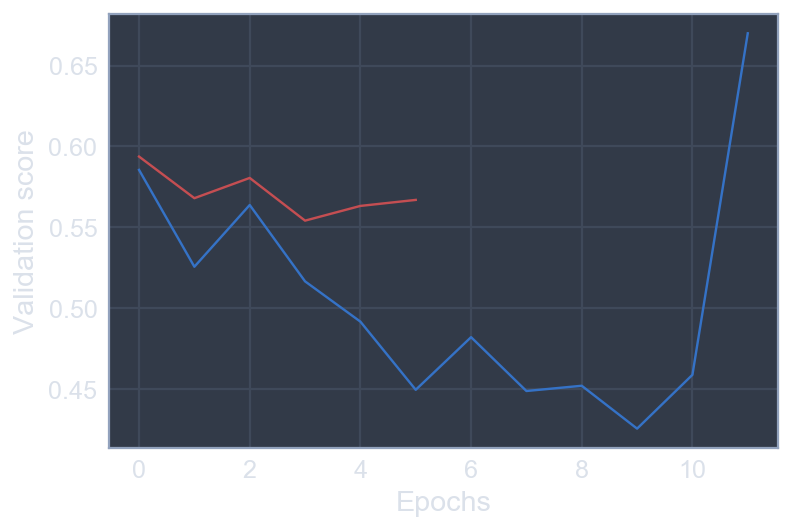

In [37]:
early_stopping_monitor = EarlyStopping(patience=2)

model_2 = Sequential()
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(2, activation='softmax'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2,
                               callbacks=[early_stopping_monitor], verbose=False)


model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(2, activation='softmax'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2,
                               callbacks=[early_stopping_monitor], verbose=False)



plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

### №28 Adding layers to a network

* Specify a model called `model_2` that is like `model_1`, but which has 3 hidden layers of 50 units instead of only 1 hidden layer
    * Use `input_shape` to specify the input shape in the first hidden layer
    * Use `'relu'` activation for the 3 hidden layers and `'softmax'` for the output layer, which should have 2 units
* Compile `model_2` as you have done with previous models: Using `'adam'` as the `optimizer`, `'categorical_crossentropy'` for the `loss`, and `metrics=['accuracy']`
* Fit both the models and visualize which one gives better results! For both models, you should look for the best `val_loss` and `val_acc`, which won't be the last epoch for that model

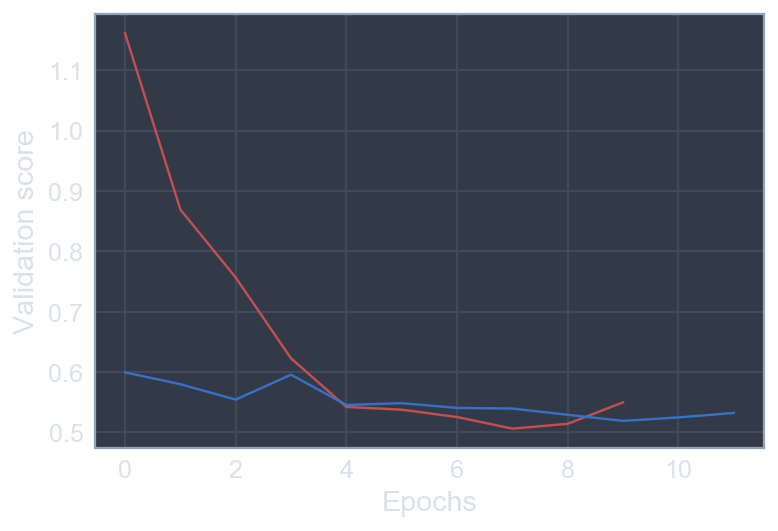

In [38]:
input_shape = (n_cols,)

model_2 = Sequential()
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(2, activation='softmax'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4,
                               callbacks=[early_stopping_monitor], verbose=False)

model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape=input_shape))
model_1.add(Dense(2, activation='softmax'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4,
                               callbacks=[early_stopping_monitor], verbose=False)

plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

## 14. Thinking about model capacity

### Overfitting

<img src='Deep_Learning_in_Python/Pictures/Overfitting.png' alt='Overfitting' width=400 align='left'>

### Workflow for optimizing model capacity

* Start with a small network
* Gradually increase capacity
* Keep increasing capacity until validation score is no longer improving

### Sequential experiments

<img src='Deep_Learning_in_Python/Pictures/Sequential_experiments.png' alt='Sequential experiments' width=400 align='left'>

### №29 Experimenting with model structures

You've just run an experiment where you compared two networks that were identical except that the 2nd network had an extra hidden layer. You see that this 2nd network (the deeper network) had better performance. Given that, which of the following would be a good experiment to run next for even better performance?

* Try a new network with fewer layers than anything you have tried yet
* *Use more units in each hidden layer*
* Use fewer units in each hidden layer

## 15. Stepping up to images

### Recognizing handwritten digits

* MNIST dataset
* 28 x 28 grid flattened to 784 values for each image
* Value in each part of array denotes darkness of that pixel

<img src='Deep_Learning_in_Python/Pictures/digits.png' alt='digits' width=200 align='left'>

### №30 Building your own digit recognition model

* Create a `Sequential` object to start your model. Call this `model`
* Add the first Dense hidden layer of `50` units to your model with `'relu'` activation. For this data, the `input_shape` is `(784,)`
* Add a second `Dense` hidden layer with `50` units and a `'relu'` activation function
* Add the output layer. Your activation function should be `'softmax'`, and the number of nodes in this layer should be the same as the number of possible outputs in this case: `10`
* Compile model as you have done with previous models: Using `'adam'` as the `optimizer`, `'categorical_crossentropy'` for the `loss`, and `metrics=['accuracy']`
* Fit the model using `X` and `y` using a `validation_split` of `0.3`

```python
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, validation_split=.3)
```

In [39]:
digits = pd.read_csv('Deep_Learning_in_Python/mnist.csv', header=None)
digits.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617
1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
